In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df1 = pd.read_csv('hr_app_employees.csv')
df2 = pd.read_csv('hr_app_employeeskills.csv')

/tmp/ipython-input-1016988800.py:1: DtypeWarning: Columns (14,17,41,63,67,70) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('hr_app_employees.csv')


In [ ]:
df2['skills_id'].duplicated().sum()

np.int64(10647)

In [ ]:
df2.head()

,id,comitted_production_per_hour,hired_for_this,remarks,employee_id,skills_id,process_id,efficiency,smv
0,15,90,yes,NaN,9842,8.0,44.0,NaN,0.0
1,16,60,yes,NaN,9842,8.0,6.0,NaN,0.0
2,17,100,yes,NaN,9842,8.0,7.0,NaN,0.0
3,18,120,yes,NaN,9846,12.0,97.0,NaN,0.0
4,19,140,yes,NaN,9846,8.0,97.0,NaN,0.0


In [ ]:
import pandas as pd


df_employee_skills = df2.groupby('employee_id').agg({
    'skills_id': lambda x: list(x)
}).reset_index()


df_employee_skills.columns = ['employee_id', 'skills_list']

In [ ]:
df_employee_skills.head()

,employee_id,skills_list
0,19,[294.0]
1,103,"[86.0, 86.0]"
2,104,"[86.0, 86.0]"
3,105,"[86.0, 86.0, 86.0, 86.0, 86.0]"
4,109,"[86.0, 86.0]"


In [ ]:
df_merged = df_merged = df1.merge(
    df_employee_skills,
    left_on='id',
    right_on='employee_id'
)

In [ ]:
df_merged = df_merged[['id','gender','over_time','emplyment_status','grade','gross_salary','branch_id','department_id','salary_mode','duty_mode','skills_list','designation_id']]

In [ ]:
df_merged.columns

Index(['id', 'gender', 'over_time', 'emplyment_status', 'grade',
       'gross_salary', 'branch_id', 'department_id', 'salary_mode',
       'duty_mode', 'skills_list', 'designation_id'],
      dtype='object')

In [ ]:
df_merged.isna().sum()

,0
id,0
gender,0
over_time,0
emplyment_status,0
grade,204
gross_salary,0
branch_id,0
department_id,0
salary_mode,0
duty_mode,0


In [ ]:
df_merged['gender'].unique()

array(['male', 'female'], dtype=object)

In [ ]:



df_merged['gender'] = df_merged['gender'].str.strip().str.lower()

gender_map = {
    'female': 'Female',
    'famale': 'Female',
    'femel': 'Female',
    'male': 'Male',
    'Male'.lower(): 'Male',
    'others': 'Others'
}

df_merged['gender'] = df_merged['gender'].map(gender_map)
df_merged = df_merged.dropna(subset=['gender'])



print(df_merged.isna().sum())

id                    0
gender                0
over_time             0
emplyment_status      0
grade               204
gross_salary          0
branch_id             0
department_id         0
salary_mode           0
duty_mode             0
skills_list           0
designation_id        0
dtype: int64


In [ ]:
df_merged['over_time'].unique()

array(['Ineligible', 'Eligible'], dtype=object)

In [ ]:

df_merged['over_time'] = df_merged['over_time'].str.strip().str.lower()


ot_map = {
    'eligible': 'Eligible',
    'y': 'Eligible',
    'ineligible': 'Ineligible'
}


df_merged['over_time'] = df_merged['over_time'].map(ot_map)


print(df_merged['over_time'].unique())
print(df_merged['over_time'].value_counts())

['Ineligible' 'Eligible']
over_time
Eligible      5017
Ineligible     244
Name: count, dtype: int64


In [ ]:
df_merged['grade'].unique()

array([ nan,   3.,   2.,   4.,   1., 999.,   6.])

In [ ]:
df_merged['grade'] = pd.to_numeric(df_merged['grade'], errors='coerce')

In [ ]:
mode_grade = df_merged['grade'].mode()[0]
df_merged['grade'] = df_merged['grade'].fillna(mode_grade)

In [ ]:
df_merged = df_merged[df_merged['grade'].between(1, 4)]

In [ ]:
df_merged.shape

(5250, 12)

In [ ]:
df_merged['salary_mode'].unique()

array(['regular'], dtype=object)

In [ ]:
df_merged.isna().sum()

,0
id,0
gender,0
over_time,0
emplyment_status,0
grade,0
gross_salary,0
branch_id,0
department_id,0
salary_mode,0
duty_mode,0


In [ ]:
df_merged.shape

(5250, 12)

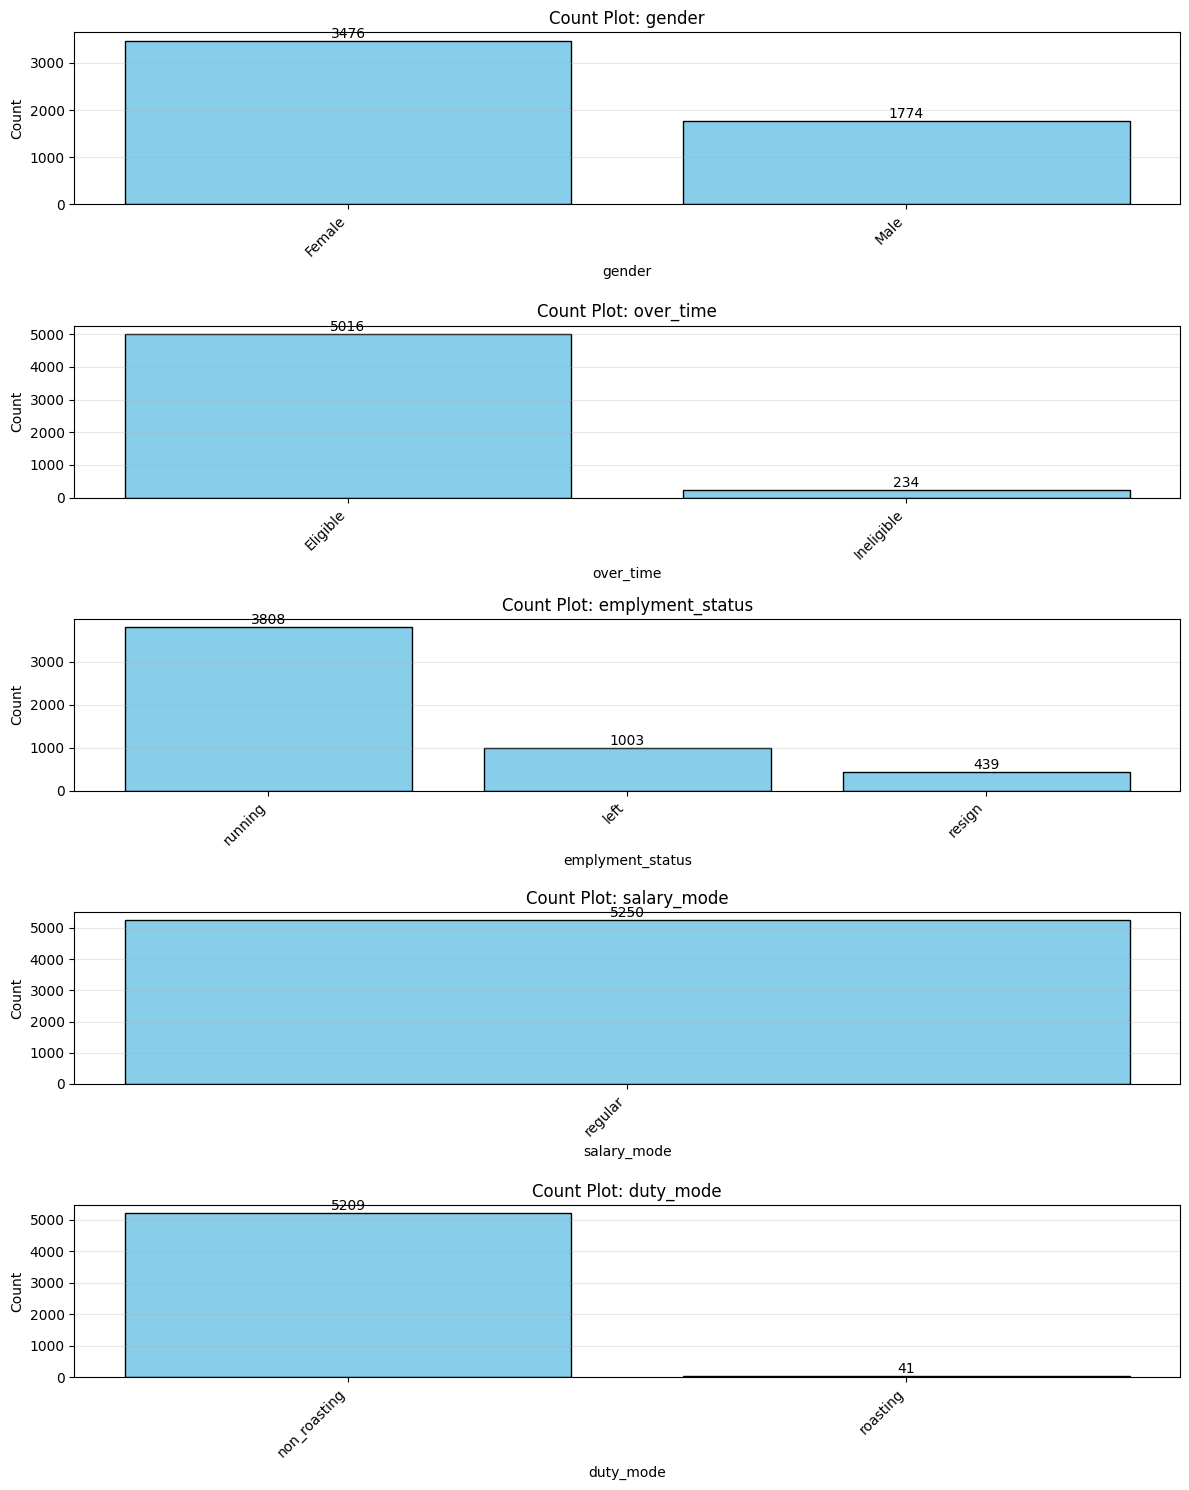

In [ ]:
import matplotlib.pyplot as plt


categorical_cols = ['gender', 'over_time', 'emplyment_status',
                    'salary_mode', 'duty_mode']

fig, axes = plt.subplots(len(categorical_cols), 1,
                         figsize=(12, len(categorical_cols)*3))

for idx, col in enumerate(categorical_cols):
    if len(categorical_cols) == 1:
        ax = axes
    else:
        ax = axes[idx]

    value_counts = df_merged[col].value_counts()
    ax.bar(range(len(value_counts)), value_counts.values,
           color='skyblue', edgecolor='black')
    ax.set_xticks(range(len(value_counts)))
    ax.set_xticklabels(value_counts.index, rotation=45, ha='right')
    ax.set_title(f'Count Plot: {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    ax.grid(axis='y', alpha=0.3)


    for i, v in enumerate(value_counts.values):
        ax.text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()


plt.savefig('categorical_count_plots.png', dpi=300, bbox_inches='tight')


plt.show()

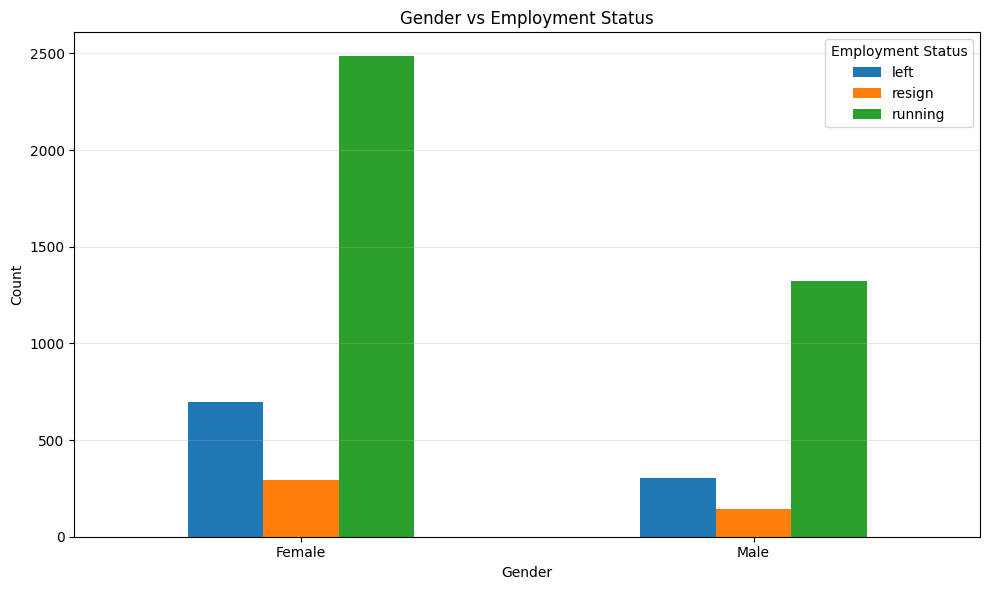

In [ ]:
# Visualize crosstab
ct = pd.crosstab(df_merged['gender'], df_merged['emplyment_status'])
ct.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Gender vs Employment Status')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Employment Status')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('gender_employment_crosstab.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5250 entries, 0 to 5260
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                5250 non-null   int64  
 1   gender            5250 non-null   object 
 2   over_time         5250 non-null   object 
 3   emplyment_status  5250 non-null   object 
 4   grade             5250 non-null   float64
 5   gross_salary      5250 non-null   int64  
 6   branch_id         5250 non-null   int64  
 7   department_id     5250 non-null   int64  
 8   salary_mode       5250 non-null   object 
 9   duty_mode         5250 non-null   object 
 10  skills_list       5250 non-null   object 
 11  designation_id    5250 non-null   int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 533.2+ KB


In [ ]:
df_merged.describe()

,id,grade,gross_salary,branch_id,department_id,designation_id
count,5250.000000,5250.000000,5250.000000,5250.000000,5250.000000,5250.000000
mean,11472.313905,2.659238,15283.304952,8.457333,149.166667,529.850667
std,5122.650330,0.684223,3712.642124,4.280438,80.367750,296.059320
min,19.000000,1.000000,8450.000000,2.000000,5.000000,19.000000
25%,7785.250000,2.000000,14300.000000,5.000000,96.000000,314.000000
50%,12662.000000,3.000000,14549.000000,11.000000,179.000000,644.000000
75%,15927.750000,3.000000,15337.000000,11.000000,196.000000,679.000000
max,18455.000000,4.000000,65600.000000,20.000000,421.000000,1600.000000


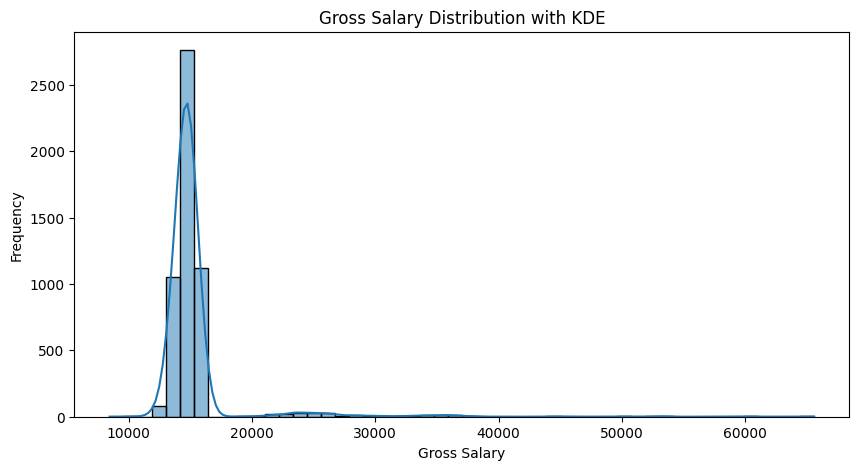

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.histplot(df_merged['gross_salary'], bins=50, kde=True)
plt.title("Gross Salary Distribution with KDE")
plt.xlabel("Gross Salary")
plt.ylabel("Frequency")
plt.show()

In [ ]:
df_merged['gross_salary'].skew()

np.float64(6.847121921898209)

In [ ]:

upper_limit = df_merged['gross_salary'].quantile(0.99)

df_merged['gross_salary_capped'] = df_merged['gross_salary'].clip(upper=upper_limit)

In [ ]:
df_merged['gross_salary_capped'].skew()

np.float64(4.80411621937944)

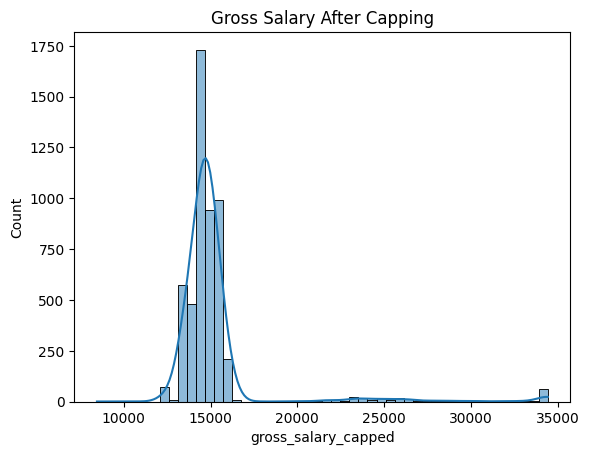

In [ ]:
sns.histplot(df_merged['gross_salary_capped'], bins=50, kde=True)
plt.title("Gross Salary After Capping")
plt.show()

In [ ]:
df_ml = df_merged[['grade','gross_salary_capped','department_id','designation_id',
                   'skills_list']]

In [ ]:
df_ml['skills_list']

,skills_list
0,[294.0]
1,"[86.0, 86.0]"
2,"[86.0, 86.0]"
3,"[86.0, 86.0, 86.0, 86.0, 86.0]"
4,"[86.0, 86.0]"
...,...
5256,[nan]
5257,"[15.0, 15.0, 8.0]"
5258,"[14.0, 14.0, 80.0]"
5259,"[11.0, 8.0, 12.0, 8.0, 252.0, 8.0]"


Encoding Summary:
Total columns: 149
Total rows: 5250

Column names:
['id', 'gross_salary', 'gender_encoded', 'grade_encoded', 'skill_8', 'skill_9', 'skill_10', 'skill_11', 'skill_12', 'skill_13', 'skill_14', 'skill_15', 'skill_16', 'skill_17', 'skill_18', 'skill_19', 'skill_20', 'skill_21', 'skill_22', 'skill_23', 'skill_24', 'skill_26', 'skill_28', 'skill_29', 'skill_31', 'skill_32', 'skill_44', 'skill_47', 'skill_51', 'skill_80', 'skill_81', 'skill_85', 'skill_86', 'skill_87', 'skill_88', 'skill_89', 'skill_90', 'skill_91', 'skill_92', 'skill_93', 'skill_94', 'skill_95', 'skill_97', 'skill_98', 'skill_99', 'skill_100', 'skill_102', 'skill_104', 'skill_109', 'skill_158', 'skill_163', 'skill_165', 'skill_166', 'skill_167', 'skill_168', 'skill_169', 'skill_171', 'skill_172', 'skill_173', 'skill_174', 'skill_176', 'skill_177', 'skill_178', 'skill_179', 'skill_182', 'skill_183', 'skill_186', 'skill_187', 'skill_188', 'skill_189', 'skill_204', 'skill_209', 'skill_225', 'skill_228', 'skill

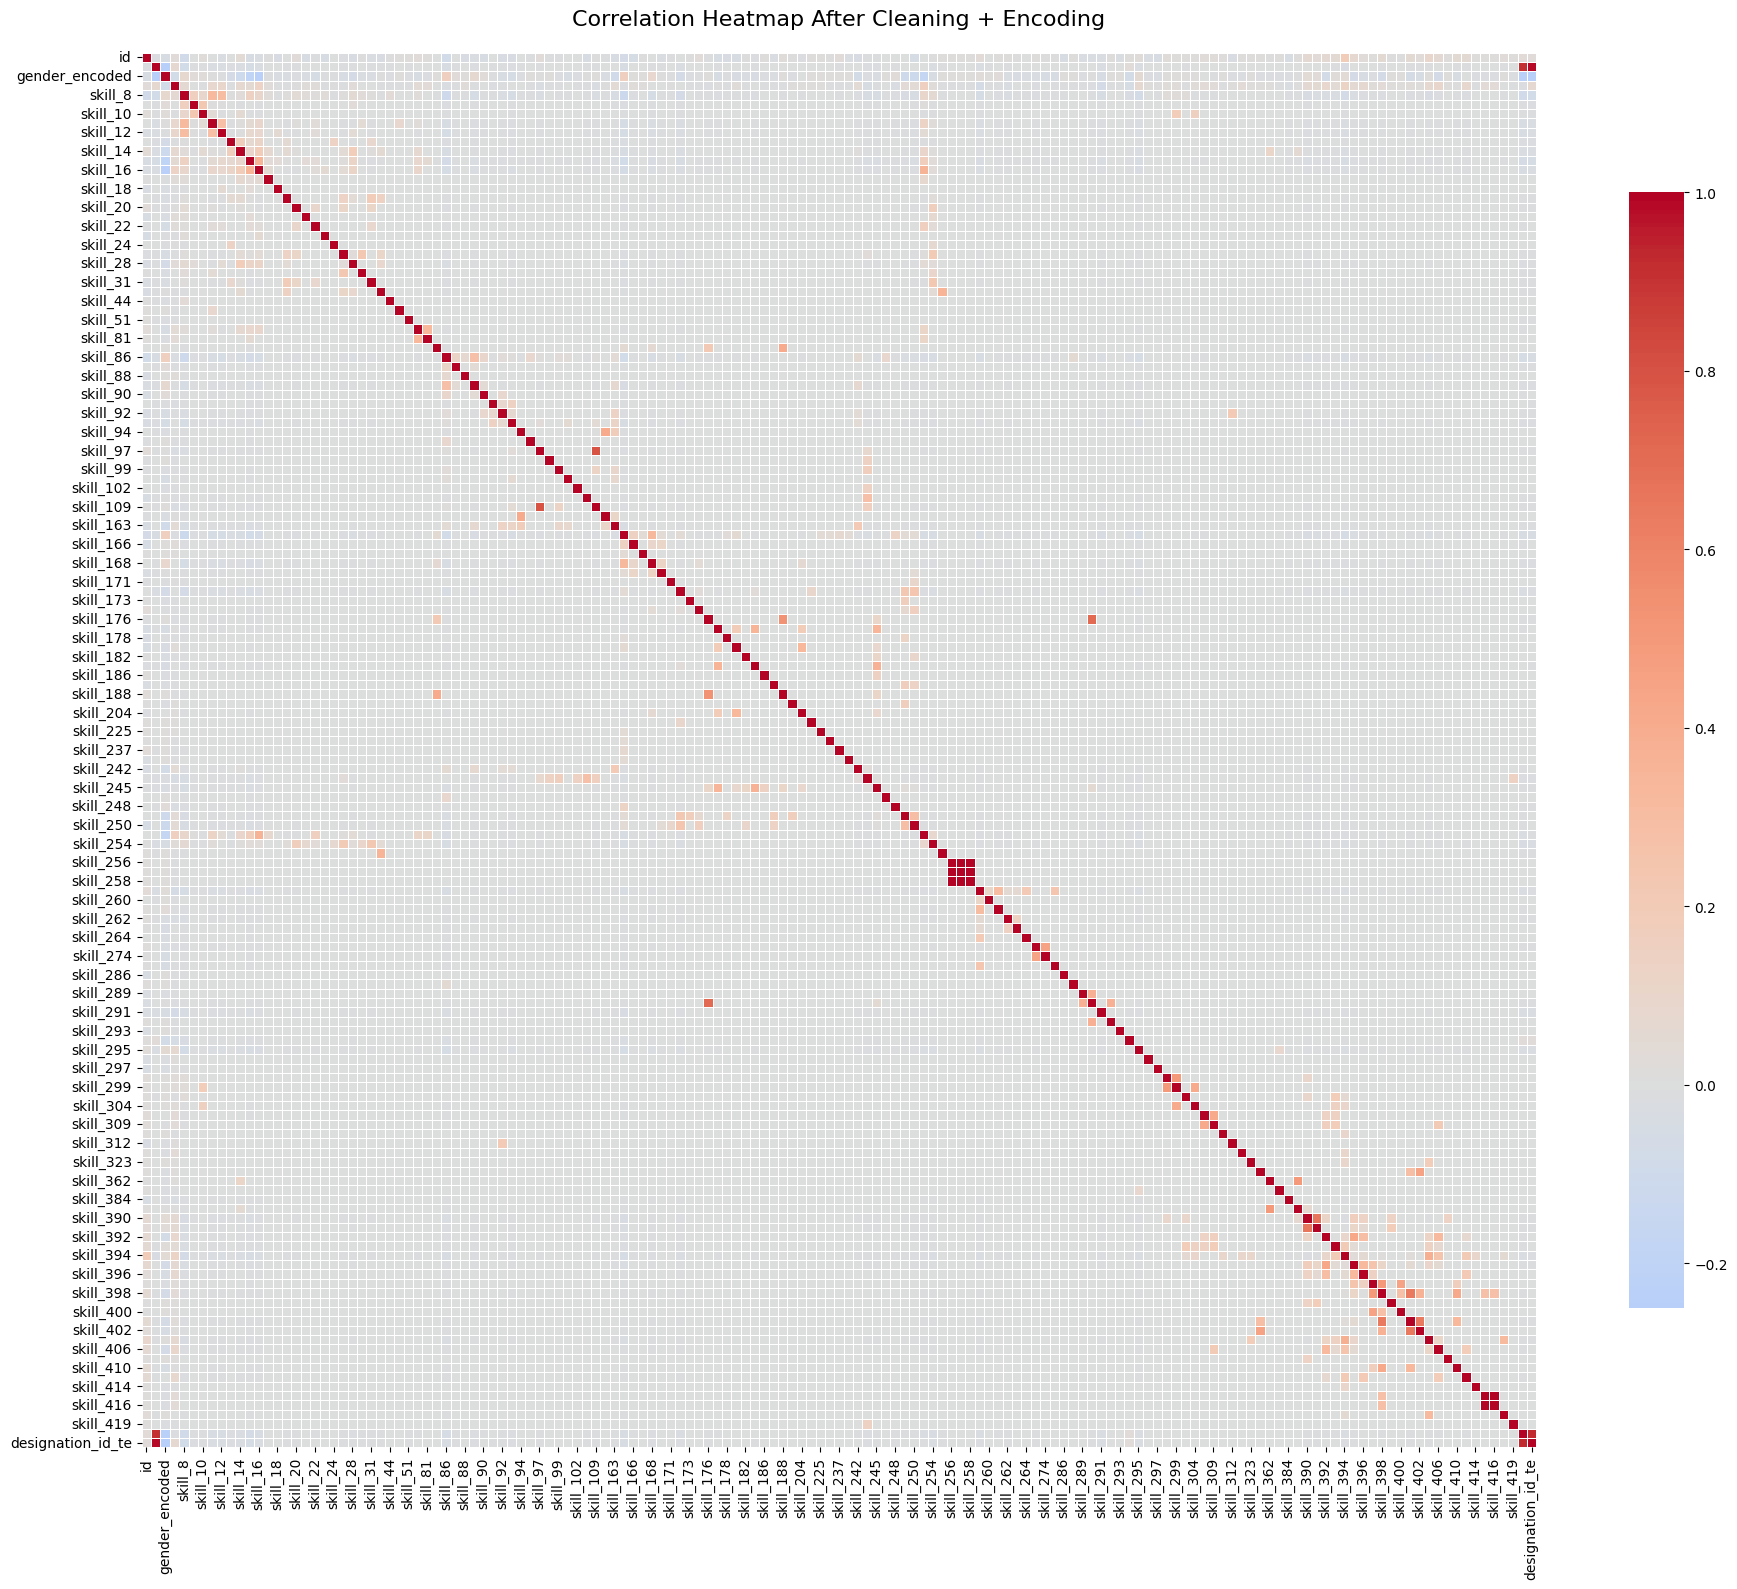


TOP 15 FEATURES CORRELATED WITH GROSS_SALARY:
gross_salary         1.000000
designation_id_te    0.986424
department_id_te     0.911639
grade_encoded        0.068099
skill_294            0.029041
skill_391            0.003656
skill_81             0.003037
skill_189            0.002338
skill_304            0.002177
skill_396            0.001613
skill_400            0.001527
skill_88             0.001221
skill_362            0.001122
skill_179            0.001024
skill_242            0.000881
skill_17             0.000742
Name: gross_salary, dtype: float64


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer


df_selected = df_merged[['id', 'gender', 'grade',
                         'skills_list', 'department_id',
                         'designation_id', 'gross_salary']].copy()


df_selected['gender'] = df_selected['gender'].str.lower().str.strip()

gender_map = {
    'male': 0,
    'female': 1,
    'famale': 1,
    'femel': 1,
    'others': 2
}

df_selected['gender_encoded'] = df_selected['gender'].map(gender_map)


df_selected = df_selected.drop(columns=['gender'])


df_selected['grade_encoded'] = df_selected['grade'].map({
    1: 4,  # Highest salary -> Highest value
    2: 3,
    3: 2,
    4: 1   # Lowest salary -> Lowest value
})

# Drop original grade column
df_selected = df_selected.drop(columns=['grade'])


def clean_skills(skill_list):
    if not isinstance(skill_list, list):
        return []
    # Remove NaN values and convert to set to remove duplicates, then back to list
    cleaned = [skill for skill in skill_list if pd.notna(skill)]
    return list(set(cleaned))

df_selected['skills_list_cleaned'] = df_selected['skills_list'].apply(clean_skills)

# MultiLabelBinarizer handles lists of skills
mlb = MultiLabelBinarizer()
skills_encoded = mlb.fit_transform(df_selected['skills_list_cleaned'])

# Create dataframe with skill columns
skills_df = pd.DataFrame(
    skills_encoded,
    columns=[f'skill_{int(skill)}' for skill in mlb.classes_],
    index=df_selected.index
)

# Concatenate with main dataframe
df_encoded = pd.concat([df_selected.drop(columns=['skills_list', 'skills_list_cleaned']), skills_df], axis=1)


def target_encode(df, column, target='gross_salary'):
    means = df.groupby(column)[target].mean()
    return df[column].map(means)


df_encoded['department_id_te'] = target_encode(df_encoded, 'department_id')
df_encoded['designation_id_te'] = target_encode(df_encoded, 'designation_id')


df_encoded = df_encoded.drop(['department_id', 'designation_id'], axis=1)


print("Encoding Summary:")
print(f"Total columns: {df_encoded.shape[1]}")
print(f"Total rows: {df_encoded.shape[0]}")
print(f"\nColumn names:")
print(df_encoded.columns.tolist())
print(f"\nFirst few rows:")
print(df_encoded.head())


plt.figure(figsize=(20, 16))
correlation_matrix = df_encoded.corr()

# Plot heatmap (without annotations if too many columns)
if len(correlation_matrix.columns) > 30:
    sns.heatmap(correlation_matrix, cmap='coolwarm', center=0,
                square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
else:
    sns.heatmap(correlation_matrix, annot=True, fmt='.2f',
                cmap='coolwarm', center=0, square=True,
                linewidths=0.5, cbar_kws={"shrink": 0.8})

plt.title("Correlation Heatmap After Cleaning + Encoding", fontsize=16, pad=20)
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

# ---------------------------------------------------
# 9. TOP CORRELATIONS WITH GROSS_SALARY
# ---------------------------------------------------
print("\n" + "="*60)
print("TOP 15 FEATURES CORRELATED WITH GROSS_SALARY:")
print("="*60)
salary_corr = df_encoded.corr()['gross_salary'].sort_values(ascending=False)
print(salary_corr.head(16))  # 16 because gross_salary will be 1.0 with itself

In [ ]:
df_ml.columns

Index(['grade', 'gross_salary_capped', 'department_id', 'designation_id',
       'skills_list'],
      dtype='object')

In [ ]:
numeric_cols = df_ml.select_dtypes(include=['int64', 'float64'])

In [ ]:
corr = numeric_cols.corr()

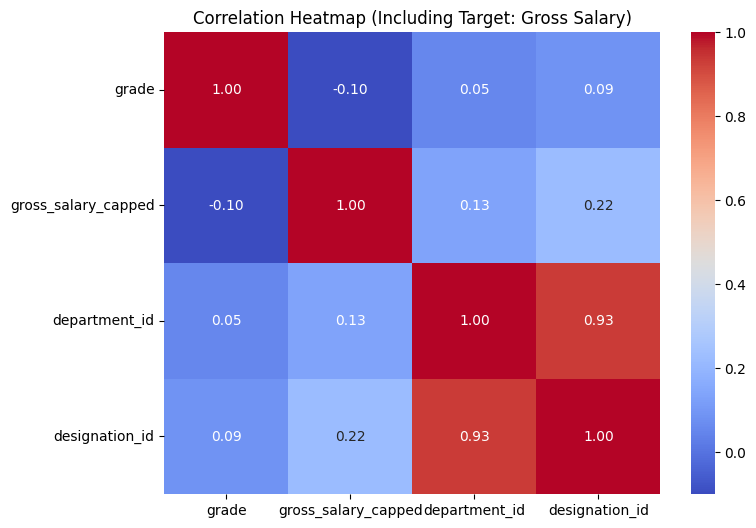

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Heatmap (Including Target: Gross Salary)")
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df_ml.columns

Index(['grade', 'gross_salary_capped', 'department_id', 'designation_id',
       'skills_list'],
      dtype='object')

In [ ]:
df_encoded = df_ml.copy()

In [ ]:
df_encoded['grade_encoded'] = df_encoded['grade'].map({
    1: 4,  # Highest salary -> Highest value
    2: 3,
    3: 2,
    4: 1   # Lowest salary -> Lowest value
})
df_encoded = df_encoded.drop(columns=['grade'])

In [ ]:
def clean_skills(skill_list):
    if not isinstance(skill_list, list):
        return []
    # Remove NaN values and duplicates
    cleaned = [skill for skill in skill_list if pd.notna(skill)]
    return list(set(cleaned))

df_encoded['skills_list_cleaned'] = df_encoded['skills_list'].apply(clean_skills)

In [ ]:
# MultiLabelBinarizer
mlb = MultiLabelBinarizer()
skills_encoded = mlb.fit_transform(df_encoded['skills_list_cleaned'])

# Create skill columns
skills_df = pd.DataFrame(
    skills_encoded,
    columns=[f'skill_{int(skill)}' for skill in mlb.classes_],
    index=df_encoded.index
)

In [ ]:
df_encoded = pd.concat([df_encoded.drop(columns=['skills_list', 'skills_list_cleaned']), skills_df], axis=1)

In [ ]:
def target_encode(df, column, target='gross_salary_capped'):
    means = df.groupby(column)[target].mean()
    return df[column].map(means)

df_encoded['department_id_te'] = target_encode(df_encoded, 'department_id')
df_encoded['designation_id_te'] = target_encode(df_encoded, 'designation_id')

In [ ]:
df_encoded = df_encoded.drop(['department_id', 'designation_id'], axis=1)

In [ ]:
X = df_encoded.drop('gross_salary_capped', axis=1)
y = df_encoded['gross_salary_capped']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=1.0),
    'Decision Tree': DecisionTreeRegressor(random_state=42, max_depth=20),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'AdaBoost': AdaBoostRegressor(n_estimators=100, random_state=42)
}

In [ ]:
results = {}

# Train and evaluate each model
for name, model in models.items():

    print(f"Training: {name}")
    print('=' * 60)

    # Train
    model.fit(X_train, y_train)

    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Metrics
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Store results
    results[name] = {
        'Train MAE': train_mae,
        'Test MAE': test_mae,
        'Train RMSE': train_rmse,
        'Test RMSE': test_rmse,
        'Train R²': train_r2,
        'Test R²': test_r2,
        'Model': model,
        'Predictions': y_test_pred
    }

    print(f"Train MAE: {train_mae:,.2f} | Test MAE: {test_mae:,.2f}")
    print(f"Train RMSE: {train_rmse:,.2f} | Test RMSE: {test_rmse:,.2f}")
    print(f"Train R²: {train_r2:.4f} | Test R²: {test_r2:.4f}")

    # Overfitting check
    overfit_gap = train_r2 - test_r2
    if overfit_gap > 0.15:
        print(f" High overfitting (gap: {overfit_gap:.4f})")
    elif overfit_gap > 0.05:
        print(f" Moderate overfitting (gap: {overfit_gap:.4f})")
    else:
        print(f" Good generalization (gap: {overfit_gap:.4f})")

Training: Linear Regression
Train MAE: 382.87 | Test MAE: 393.65
Train RMSE: 567.47 | Test RMSE: 561.18
Train R²: 0.9653 | Test R²: 0.9543
 Good generalization (gap: 0.0110)
Training: Ridge Regression
Train MAE: 385.00 | Test MAE: 393.64
Train RMSE: 568.13 | Test RMSE: 560.79
Train R²: 0.9652 | Test R²: 0.9543
 Good generalization (gap: 0.0109)
Training: Lasso Regression
Train MAE: 391.78 | Test MAE: 398.15
Train RMSE: 573.84 | Test RMSE: 563.27
Train R²: 0.9645 | Test R²: 0.9539
 Good generalization (gap: 0.0106)
Training: Decision Tree
Train MAE: 352.03 | Test MAE: 419.90
Train RMSE: 547.45 | Test RMSE: 627.96
Train R²: 0.9677 | Test R²: 0.9427
 Good generalization (gap: 0.0250)
Training: Random Forest
Train MAE: 358.05 | Test MAE: 413.31
Train RMSE: 547.09 | Test RMSE: 602.41
Train R²: 0.9677 | Test R²: 0.9473
 Good generalization (gap: 0.0204)
Training: Gradient Boosting
Train MAE: 386.57 | Test MAE: 409.14
Train RMSE: 565.72 | Test RMSE: 589.26
Train R²: 0.9655 | Test R²: 0.9496
 

In [ ]:
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Test MAE': [results[m]['Test MAE'] for m in results.keys()],
    'Test RMSE': [results[m]['Test RMSE'] for m in results.keys()],
    'Test R²': [results[m]['Test R²'] for m in results.keys()]
}).sort_values('Test MAE')

print("\nModel Performance Summary (sorted by Test MAE):")
print(comparison_df.to_string(index=False))


Model Performance Summary (sorted by Test MAE):
            Model   Test MAE  Test RMSE  Test R²
 Ridge Regression 393.642707 560.787786 0.954320
Linear Regression 393.650915 561.178379 0.954256
 Lasso Regression 398.152627 563.273997 0.953914
Gradient Boosting 409.143392 589.261891 0.949563
    Random Forest 413.308866 602.410854 0.947287
    Decision Tree 419.896014 627.958657 0.942722
         AdaBoost 474.247434 714.713602 0.925802


In [ ]:
best_model_name = comparison_df.iloc[0]['Model']
best_model = results[best_model_name]['Model']

print(f"\n BEST MODEL: {best_model_name}")
print(f"   Test MAE: {comparison_df.iloc[0]['Test MAE']:,.2f}")
print(f"   Test R²: {comparison_df.iloc[0]['Test R²']:.4f}")
print(f"   Prediction error: ±{comparison_df.iloc[0]['Test MAE']:,.0f} salary units")


 BEST MODEL: Ridge Regression
   Test MAE: 393.64
   Test R²: 0.9543
   Prediction error: ±394 salary units


In [ ]:
print("\n" + "="*60)
print("STEP 7: HYPERPARAMETER TUNING")
print("="*60)

if best_model_name == 'Random Forest':
    print("\nTuning Random Forest...")
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [15, 20, 25, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2', None]
    }

    grid_search = GridSearchCV(
        RandomForestRegressor(random_state=42, n_jobs=-1),
        param_grid,
        cv=5,
        scoring='neg_mean_absolute_error',
        n_jobs=-1,
        verbose=1
    )

    print("Starting grid search... (this may take a few minutes)")
    grid_search.fit(X_train, y_train)

    print(f"\n Best parameters: {grid_search.best_params_}")

    tuned_model = grid_search.best_estimator_
    y_test_pred_tuned = tuned_model.predict(X_test)

    tuned_mae = mean_absolute_error(y_test, y_test_pred_tuned)
    tuned_r2 = r2_score(y_test, y_test_pred_tuned)

    print(f"\n Tuned Model Performance:")
    print(f"   Test MAE: {tuned_mae:,.2f} (baseline: {results[best_model_name]['Test MAE']:,.2f})")
    print(f"   Test R²: {tuned_r2:.4f} (baseline: {results[best_model_name]['Test R²']:.4f})")
    print(f"   Improvement: {results[best_model_name]['Test MAE'] - tuned_mae:,.2f} MAE reduction")

    if tuned_mae < results[best_model_name]['Test MAE']:
        best_model = tuned_model
        results[best_model_name]['Predictions'] = y_test_pred_tuned

elif best_model_name == 'Gradient Boosting':
    print("\nTuning Gradient Boosting...")
    param_grid = {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5, 7, 9],
        'min_samples_split': [2, 5, 10]
    }

    grid_search = GridSearchCV(
        GradientBoostingRegressor(random_state=42),
        param_grid,
        cv=5,
        scoring='neg_mean_absolute_error',
        n_jobs=-1,
        verbose=1
    )

    print("Starting grid search...")
    grid_search.fit(X_train, y_train)

    print(f"\n Best parameters: {grid_search.best_params_}")

    tuned_model = grid_search.best_estimator_
    y_test_pred_tuned = tuned_model.predict(X_test)

    tuned_mae = mean_absolute_error(y_test, y_test_pred_tuned)
    tuned_r2 = r2_score(y_test, y_test_pred_tuned)

    print(f"\n Tuned Model Performance:")
    print(f"   Test MAE: {tuned_mae:,.2f} (baseline: {results[best_model_name]['Test MAE']:,.2f})")
    print(f"   Test R²: {tuned_r2:.4f} (baseline: {results[best_model_name]['Test R²']:.4f})")
    print(f"   Improvement: {results[best_model_name]['Test MAE'] - tuned_mae:,.2f}")

    if tuned_mae < results[best_model_name]['Test MAE']:
        best_model = tuned_model
        results[best_model_name]['Predictions'] = y_test_pred_tuned

else:
    print(f"Hyperparameter tuning not implemented for {best_model_name}")


STEP 7: HYPERPARAMETER TUNING
Hyperparameter tuning not implemented for Ridge Regression


NameError: name 'tree_models' is not defined

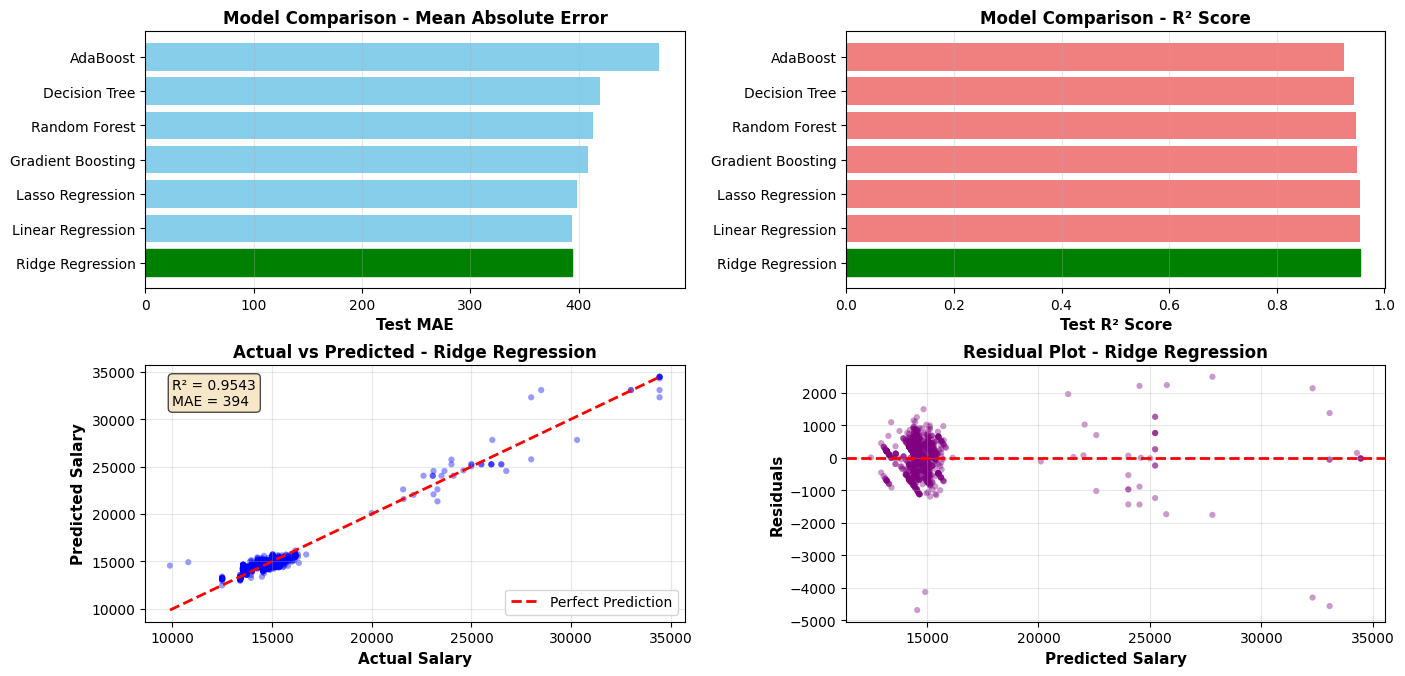

In [ ]:
fig = plt.figure(figsize=(16, 12))
gs = fig.add_gridspec(3, 2, hspace=0.3, wspace=0.3)

# 1. Model Comparison - MAE
ax1 = fig.add_subplot(gs[0, 0])
comparison_sorted = comparison_df.sort_values('Test MAE', ascending=True)
bars = ax1.barh(comparison_sorted['Model'], comparison_sorted['Test MAE'], color='skyblue')
bars[0].set_color('green')
ax1.set_xlabel('Test MAE', fontsize=11, fontweight='bold')
ax1.set_title('Model Comparison - Mean Absolute Error', fontsize=12, fontweight='bold')
ax1.grid(axis='x', alpha=0.3)

# 2. Model Comparison - R²
ax2 = fig.add_subplot(gs[0, 1])
comparison_sorted_r2 = comparison_df.sort_values('Test R²', ascending=False)
bars2 = ax2.barh(comparison_sorted_r2['Model'], comparison_sorted_r2['Test R²'], color='lightcoral')
bars2[0].set_color('green')
ax2.set_xlabel('Test R² Score', fontsize=11, fontweight='bold')
ax2.set_title('Model Comparison - R² Score', fontsize=12, fontweight='bold')
ax2.grid(axis='x', alpha=0.3)

# 3. Actual vs Predicted
ax3 = fig.add_subplot(gs[1, 0])
y_pred_best = results[best_model_name]['Predictions']
ax3.scatter(y_test, y_pred_best, alpha=0.4, s=20, c='blue', edgecolors='none')
min_val = min(y_test.min(), y_pred_best.min())
max_val = max(y_test.max(), y_pred_best.max())
ax3.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect Prediction')
ax3.set_xlabel('Actual Salary', fontsize=11, fontweight='bold')
ax3.set_ylabel('Predicted Salary', fontsize=11, fontweight='bold')
ax3.set_title(f'Actual vs Predicted - {best_model_name}', fontsize=12, fontweight='bold')
ax3.legend()
ax3.grid(alpha=0.3)
r2_text = f"R² = {results[best_model_name]['Test R²']:.4f}\nMAE = {results[best_model_name]['Test MAE']:,.0f}"
ax3.text(0.05, 0.95, r2_text, transform=ax3.transAxes, fontsize=10,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.7))

# 4. Residual Plot
ax4 = fig.add_subplot(gs[1, 1])
residuals = y_test.values - y_pred_best
ax4.scatter(y_pred_best, residuals, alpha=0.4, s=20, c='purple', edgecolors='none')
ax4.axhline(y=0, color='r', linestyle='--', lw=2)
ax4.set_xlabel('Predicted Salary', fontsize=11, fontweight='bold')
ax4.set_ylabel('Residuals', fontsize=11, fontweight='bold')
ax4.set_title(f'Residual Plot - {best_model_name}', fontsize=12, fontweight='bold')
ax4.grid(alpha=0.3)
# 5. Feature Importance or Error Distribution
if best_model_name in tree_models and hasattr(best_model, 'feature_importances_'):
    ax5 = fig.add_subplot(gs[2, :])
    importance_df = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': best_model.feature_importances_
    }).sort_values('Importance', ascending=True).tail(15)

    ax5.barh(importance_df['Feature'], importance_df['Importance'], color='seagreen')
    ax5.set_xlabel('Importance', fontsize=11, fontweight='bold')
    ax5.set_ylabel('Feature', fontsize=11, fontweight='bold')
    ax5.set_title(f'Top 15 Feature Importance - {best_model_name}', fontsize=12, fontweight='bold')
    ax5.grid(axis='x', alpha=0.3)
else:
    # Error distribution
    ax5 = fig.add_subplot(gs[2, :])
    ax5.hist(residuals, bins=50, color='teal', alpha=0.7, edgecolor='black')
    ax5.axvline(x=0, color='r', linestyle='--', lw=2, label='Zero Error')
    ax5.set_xlabel('Residual (Actual - Predicted)', fontsize=11, fontweight='bold')
    ax5.set_ylabel('Frequency', fontsize=11, fontweight='bold')
    ax5.set_title('Distribution of Prediction Errors', fontsize=12, fontweight='bold')
    ax5.legend()
    ax5.grid(alpha=0.3)


plt.savefig('model_evaluation.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
import pickle
from google.colab import files

print("\n" + "="*60)
print("SAVING MODEL AND MAPPINGS FOR PRODUCTION")
print("="*60)

# 1. Save the trained model
with open('salary_prediction_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)
print(" Model saved: salary_prediction_model.pkl")

# 2. Save department mapping - FIXED: group by original department_id
department_mapping = df_encoded.groupby('department_id_te')['gross_salary_capped'].mean().to_dict()
with open('department_mapping.pkl', 'wb') as f:
    pickle.dump(department_mapping, f)
print(f" Department mapping saved: {len(department_mapping)} departments")

# 3. Save designation mapping - FIXED: group by original designation_id
designation_mapping = df_encoded.groupby('designation_id_te')['gross_salary_capped'].mean().to_dict()
with open('designation_mapping.pkl', 'wb') as f:
    pickle.dump(designation_mapping, f)
print(f" Designation mapping saved: {len(designation_mapping)} designations")

# 4. Save MultiLabelBinarizer (skills encoder)
with open('skills_mlb.pkl', 'wb') as f:
    pickle.dump(mlb, f)
print(f" Skills encoder saved: {len(mlb.classes_)} unique skills")

# 5. Save feature columns order
feature_columns = X_train.columns.tolist()
with open('feature_columns.pkl', 'wb') as f:
    pickle.dump(feature_columns, f)
print(f" Feature columns saved: {len(feature_columns)} features")

# 6. Save grade mapping
grade_mapping = {1: 4, 2: 3, 3: 2, 4: 1}
with open('grade_mapping.pkl', 'wb') as f:
    pickle.dump(grade_mapping, f)
print(" Grade mapping saved")

print("\n" + "="*60)
print("ALL FILES SAVED SUCCESSFULLY!")
print("="*60)

# Verify mappings are correct
print("\n" + "="*60)
print("VERIFYING MAPPINGS")
print("="*60)
print("\nSample Department Mappings (ID → Mean Salary):")
for dept_id, mean_sal in list(department_mapping.items())[:5]:
    print(f"  Department {dept_id}: ${mean_sal:,.2f}")

print("\nSample Designation Mappings (ID → Mean Salary):")
for desig_id, mean_sal in list(designation_mapping.items())[:5]:
    print(f"  Designation {desig_id}: ${mean_sal:,.2f}")

print("\n" + "="*60)
print("TESTING SAVED MODEL")
print("="*60)

# Load everything back to test
loaded_model = pickle.load(open('salary_prediction_model.pkl', 'rb'))
loaded_dept_map = pickle.load(open('department_mapping.pkl', 'rb'))
loaded_desig_map = pickle.load(open('designation_mapping.pkl', 'rb'))
loaded_mlb = pickle.load(open('skills_mlb.pkl', 'rb'))
loaded_features = pickle.load(open('feature_columns.pkl', 'rb'))
loaded_grade_map = pickle.load(open('grade_mapping.pkl', 'rb'))

print(" All files loaded successfully!")

# Test prediction with a sample
print("\nTesting prediction on first test sample...")
sample_idx = 0
actual_salary = y_test.iloc[sample_idx]
predicted_salary = best_model.predict(X_test.iloc[[sample_idx]])[0]
print(f"Actual Salary: ${actual_salary:,.2f}")
print(f"Predicted Salary: ${predicted_salary:,.2f}")
print(f"Error: ${abs(actual_salary - predicted_salary):,.2f}")

print("\n Model is ready for production!")

print("\n" + "="*60)
print("DOWNLOADING FILES FROM COLAB")
print("="*60)

# Download all 6 pickle files
files_to_download = [
    'salary_prediction_model.pkl',
    'department_mapping.pkl',
    'designation_mapping.pkl',
    'skills_mlb.pkl',
    'feature_columns.pkl',
    'grade_mapping.pkl'
]

print("\nDownloading files to your computer...")
for filename in files_to_download:
    files.download(filename)
    print(f"⬇ Downloaded: {filename}")

print("\n All files downloaded successfully!")
print("="*60)
print("Next steps:")
print("1. Check your Downloads folder for 6 .pkl files")
print("2. Share these files with your Django backend team")
print("3. They can use the SalaryPredictor class to make predictions")
print("="*60)

In [ ]:


import pickle
import numpy as np
import pandas as pd

print("\n" + "="*70)
print("TESTING MODEL WITH SAMPLE USER INPUT")



model = pickle.load(open('salary_prediction_model.pkl', 'rb'))
dept_map = pickle.load(open('department_mapping.pkl', 'rb'))
desig_map = pickle.load(open('designation_mapping.pkl', 'rb'))
mlb = pickle.load(open('skills_mlb.pkl', 'rb'))
feature_columns = pickle.load(open('feature_columns.pkl', 'rb'))
grade_map = pickle.load(open('grade_mapping.pkl', 'rb'))

print("All resources loaded successfully!")




def prepare_input_for_prediction(grade, skills_list, department_id, designation_id):
    """Converts raw user inputs into a single-row dataframe with 146 features."""


    grade_encoded = grade_map.get(grade, 0)


    skills_binary = mlb.transform([skills_list])[0]   # array of 0/1 for skills


    dept_te = dept_map.get(department_id, np.mean(list(dept_map.values())))
    desig_te = desig_map.get(designation_id, np.mean(list(desig_map.values())))


    data_dict = {"grade_encoded": grade_encoded}


    for idx, skill_name in enumerate(mlb.classes_):
        data_dict[f"skill_{skill_name}"] = skills_binary[idx]

    # Add target-encoded department/designation
    data_dict["department_id_te"] = dept_te
    data_dict["designation_id_te"] = desig_te

    # Convert to DataFrame
    df_input = pd.DataFrame([data_dict])


    df_input = df_input.reindex(columns=feature_columns, fill_value=0)

    return df_input




sample_grade = 2
sample_skills = ["8", "15"]
sample_department = 24
sample_designation = 7

print("\nSample Inputs:")
print("Grade:", sample_grade)
print("Skills:", sample_skills)
print("Department ID:", sample_department)
print("Designation ID:", sample_designation)



X_input = prepare_input_for_prediction(
    grade=sample_grade,
    skills_list=sample_skills,
    department_id=sample_department,
    designation_id=sample_designation
)

print("\nPrepared Input Shape:", X_input.shape)
print(" Input is ready for prediction")




pred_salary = model.predict(X_input)[0]

print("\n" + "="*70)
print(f"   Predicted Salary:  ${pred_salary:,.2f}")

